# Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.example_data import load_ecoli_data

# Creating ica_data object

## Annotation tables

### Gene table

In [3]:
gene_table = pd.read_csv("../../data/PRECISE-1K_data_files/gene_info.csv")
gene_table.index = gene_table['Unnamed: 0']
gene_table.rename(columns={"cog":"COG"},inplace=True)
gene_table.drop('Unnamed: 0',axis=1,inplace=True)
gene_table.index.name = None
gene_table.head()

,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,essential,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0002,thrA,thrA;thrA1;thrA2,fused aspartate kinase/homoserine dehydrogenase 1,Amino acid transport and metabolism,"RpoD,Ile-tRNA,Thr-tRNA,DksA,Fnr,ArcA,ppGpp",P00561,337,2799,+,False,...,False,True,4101.5,4434.0,True,True,10.314562,9.605329,1.042143,True
b0003,thrB,thrB,homoserine kinase,Nucleotide transport and metabolism,"RpoD,Ile-tRNA,Thr-tRNA,DksA,ppGpp",P00547,2801,3733,+,False,...,False,True,442.0,1177.0,True,True,9.982251,9.232803,1.035654,True
b0004,thrC,thrC,threonine synthase,Amino acid transport and metabolism,"RpoD,ppGpp,Ile-tRNA,Thr-tRNA,DksA",P00934,3734,5020,+,False,...,False,True,8818.5,3516.0,True,True,9.973666,9.274271,0.906287,True
b0005,yaaX,yaaX,DUF2502 domain-containing protein YaaX,Function unknown,Lrp,P75616,5234,5530,+,False,...,True,False,NaN,NaN,False,True,7.132482,6.283661,1.093146,True
b0006,yaaA,yaaA,peroxide stress resistance protein YaaA,Function unknown,NaN,P0A8I3,5683,6459,-,False,...,True,True,539.5,333.0,True,True,6.494941,6.346626,0.454519,True


### Sample table

In [4]:
sample_table = pd.read_csv("../../data/PRECISE-1K_data_files/sample_table.csv")
sample_table.index = sample_table['sample']
sample_table.drop('Unnamed: 0',axis=1,inplace=True)
sample_table.drop('sample',axis=1,inplace=True)
sample_table.index.name = "Sample ID"
sample_table.head()

,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,Temperature (C),...,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates
Sample ID,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10-02-2013,2
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10-02-2013,2
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_fe,True,True,09-05-2013,2


### iM table

In [5]:
# imodulon_table = pd.read_csv("../../../_data/ica_data/p1k_data_files/iM_table.csv")
# imodulon_table.index = imodulon_table['name']
# imodulon_table.drop('k',axis=1,inplace=True)
# imodulon_table.head()

imodulon_table = pd.read_csv("../../data/PRECISE-1K_data_files/imodulon_table.csv", index_col=0)
imodulon_table.index.name = 'name'
imodulon_table.head()

,exp_var,imodulon_size,enrichment_category,system_category,functional_category,function,regulator,n_regs,pvalue,qvalue,...,single_gene_dominant_technical,tcs,regulon_discovery,ko,PRECISE 2.0,PRECISE 2.0_pearson,PRECISE 2.0_spearman,PRECISE,PRECISE_pearson,PRECISE_spearman
name,,,,,,,,,,,,,,,,,,,,,
Sugar Diacid,0.002413,14,Regulatory,Metabolism,Carbon Metabolism,Transport and catabolism of carbohydrate diaci...,CdaR,1.0,1.595767e-24,7.110896e-20,...,False,False,False,False,CdaR,0.952054,0.758726,CdaR,0.905552,0.562704
Translation,0.007469,53,Regulatory,Translation,Translation,Ribosome biogenesis,DksA,1.0,7.972755e-65,5.125923e-60,...,False,False,False,False,Translation,0.892858,0.764432,translation,0.667232,0.482602
ygdT,0.000344,3,Technical,Single Gene,Unknown,Unknown,NaN,NaN,NaN,NaN,...,True,False,False,False,SG_ygdT,0.653472,0.422661,NaN,NaN,NaN
OxyR,0.001747,38,Regulatory,Stress Responses,Redox Stress,"Oxidative stress response, especially peroxide",OxyR,1.0,2.620144e-27,4.708660e-23,...,False,False,False,False,OxyR,0.926352,0.730520,OxyR,0.621129,0.254705
FlhDC-2,0.030021,43,Regulatory,Stress Responses,Extracellular Structures,Flagellum biosynthesis and export,FlhDC,1.0,7.733764e-62,3.447790e-57,...,False,False,False,False,FlhDC-2,0.917180,0.439455,FlhDC,0.907624,0.310641


## M

In [6]:
M = pd.read_csv("../../data/PRECISE-1K_data_files/M.csv",)
M.index = M['Unnamed: 0']
M.drop('Unnamed: 0',axis=1,inplace=True)
M.index.name = None

M.columns = list(imodulon_table.index)
M

,Sugar Diacid,Translation,ygdT,OxyR,FlhDC-2,Osmoprotectant,Glutamine,Sialic Acid,yqhI,ROS TALE Amp,...,Tryptophanase,crp KO-2,cyoB/ndh/nuoB KO-2,tpiA KO,Phage Shock,Glyoxylate,CCK-PGI Del,Acetate,Ile/Val,UC-8
b0002,-0.005367,-0.002423,0.010140,-0.001362,-0.017297,0.008631,-0.006491,0.092469,-0.010978,-0.003400,...,-0.012070,-0.008812,0.004996,0.008216,-0.002720,0.007874,-0.004350,-0.013319,0.009296,0.000891
b0003,0.006212,-0.001901,0.007207,0.000073,-0.004829,-0.003186,-0.011677,0.082103,0.011074,-0.004679,...,0.006683,-0.017798,0.000964,0.003273,0.010018,0.002132,-0.005826,-0.010836,-0.066654,-0.003513
b0004,0.010600,-0.002205,0.004961,-0.002289,-0.004938,-0.005587,-0.008127,0.080888,0.007511,0.003887,...,0.008132,-0.018105,-0.007763,0.009103,-0.002566,-0.007120,-0.005676,-0.002164,-0.060155,-0.007025
b0005,0.011520,0.008573,0.020449,-0.003123,0.002009,-0.026382,-0.016374,0.022484,0.007903,0.017561,...,-0.000139,0.001437,0.001827,-0.008113,0.065835,-0.019238,-0.001622,-0.009303,-0.069669,-0.004241
b0006,0.003482,-0.002293,-0.010146,0.140794,-0.001754,0.000974,0.023500,-0.017665,0.006247,-0.005761,...,0.017025,0.005473,-0.002252,0.002807,-0.030303,0.000805,0.028367,0.018293,-0.018444,-0.033624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,-0.003644,0.018245,-0.003134,0.004992,-0.000873,-0.021262,-0.012556,0.036707,-0.062935,0.016316,...,0.002969,-0.012892,0.024815,-0.000077,-0.004676,0.015222,0.011431,0.013733,0.011955,0.001203
b4748,0.010023,-0.030343,-0.000578,-0.002526,-0.000906,0.000805,0.007411,-0.021330,-0.013622,-0.034542,...,0.004057,-0.001059,-0.007595,0.002024,0.001573,-0.029301,-0.007873,0.021424,-0.001528,-0.000353
b4751,0.001082,0.013560,0.010030,-0.022409,0.006737,-0.012387,-0.002341,-0.010584,-0.015837,0.003776,...,-0.005873,-0.000560,0.008653,0.005759,0.029820,-0.004053,0.026769,0.020823,0.000414,-0.001453
b4755,-0.002204,-0.006527,0.003732,-0.000946,-0.009858,0.010553,-0.022747,0.003496,0.530162,0.000412,...,0.024388,0.003566,0.004696,-0.003552,0.002161,0.000556,-0.005656,0.021056,0.008180,0.021366


## Thresholds

In [7]:
thresholds = pd.read_csv("../../data/PRECISE-1K_data_files/M_thresholds.csv")
thresholds.index = list(imodulon_table.index)
thresholds = thresholds.drop("Unnamed: 0", axis=1)
thresholds = thresholds["0"].to_dict()
# thresholds

## A and sample table

In [8]:
A = pd.read_csv("../../data/PRECISE-1K_data_files/A.csv",)
A.index = A['Unnamed: 0']
A.drop('Unnamed: 0',axis=1,inplace=True)
A.index.name = None

A.columns = list(sample_table.index)
A.index = list(imodulon_table.index)
A

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
Sugar Diacid,0.048851,-0.048851,2.226245,2.238391,0.222740,0.383348,1.534940,1.480178,0.536021,0.167563,...,0.605951,3.969272,3.960774,3.431303,3.198403,3.865406,1.095074,2.575524,1.850326,2.035736
Translation,0.201055,-0.201055,-8.162122,-8.046208,1.633678,1.973262,-8.058080,-6.272859,-1.536470,-1.828831,...,2.416670,-1.187724,-1.626310,-1.492168,-0.436511,-1.004710,5.258995,-1.782148,-4.601815,-5.110518
ygdT,-0.382475,0.382475,0.066040,-0.898701,-0.556961,-1.523642,0.039413,0.002855,0.256867,-1.890067,...,-1.885401,0.689130,1.997418,2.177559,1.459224,-3.110064,4.336594,0.626609,-0.166365,0.539555
OxyR,0.130714,-0.130714,0.232581,-0.135165,-0.140487,-0.435341,-0.788937,-1.333850,0.255054,0.464381,...,-2.743285,-2.888544,-2.341820,-2.498864,-2.931448,-2.693465,-1.690293,-3.056924,-3.575826,-2.316941
FlhDC-2,-0.329000,0.329000,-5.319409,-5.196873,-7.144849,-6.758991,-5.930140,-5.934485,-1.775148,-3.070194,...,4.303118,1.626655,2.701441,1.840211,2.703303,1.862170,10.399505,-4.285524,2.349262,3.101853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glyoxylate,0.344877,-0.344877,5.450515,5.444039,-0.641401,-0.472477,5.557743,5.070821,0.423674,0.559522,...,1.180854,2.036347,2.514846,2.469912,2.064530,2.645660,0.830452,4.243346,2.047711,2.828812
CCK-PGI Del,0.077106,-0.077106,-0.260639,0.163570,1.030188,1.220775,-0.049178,0.392918,1.611484,1.699807,...,-0.360018,0.689914,1.350155,0.510417,1.075789,2.065799,-2.090274,0.143198,-0.551313,0.908994
Acetate,0.575197,-0.575197,-2.476044,-2.875184,-0.756414,-0.251539,-1.737154,-1.652438,-1.304588,-1.319442,...,1.637433,5.259582,6.259438,5.784253,4.928517,4.221586,0.574095,12.177624,12.558275,12.767103
Ile/Val,0.226627,-0.226627,1.699217,1.678226,-1.167426,-0.618004,2.100661,2.068120,-1.050492,-1.504338,...,0.388348,-1.066533,-0.469043,-1.736812,-0.701636,-0.657140,1.027797,-2.860252,-1.283872,-1.949882


## X

In [9]:
X = pd.read_csv("../../data/PRECISE-1K_data_files/log_tpm.csv")
X.index = X['Unnamed: 0']
X.drop('Unnamed: 0',axis=1,inplace=True)
X.index.name = None
X.columns = list(sample_table.index)
X

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
b0002,-0.053993,0.053993,0.879043,1.089600,0.182453,-0.078873,-0.837092,-0.502703,0.421312,0.412354,...,-0.868029,-2.012060,-1.862453,-1.950586,-1.642161,-1.666869,-0.639387,-1.552748,-1.892598,-1.831359
b0003,-0.061973,0.061973,1.063330,1.477889,0.392573,0.234671,-0.763015,-0.120989,0.546181,0.520841,...,-1.501588,-2.532496,-2.515189,-2.443481,-2.258418,-2.312108,-1.124294,-2.060022,-2.348524,-2.122772
b0004,-0.036972,0.036972,0.003132,0.356702,-0.096756,-0.334913,-1.714913,-1.322707,-0.234147,-0.250669,...,-0.691635,-1.692102,-1.608955,-1.723764,-1.376420,-1.251488,-0.529185,-1.577833,-1.383521,-1.527079
b0005,-0.104967,0.104967,-1.118145,-1.277963,-0.181546,-0.364057,-2.121475,-1.994770,-0.386684,-0.634659,...,-2.925632,-4.626965,-4.067417,-2.964371,-3.075562,-3.101967,-2.210546,-3.821019,-4.563928,-2.946659
b0006,0.042242,-0.042242,-0.123592,-0.107778,-0.173177,-0.089888,-0.208133,-0.003044,-0.034707,-0.027806,...,0.190536,-0.618740,-0.175381,-0.317349,-0.466331,-0.169979,-0.402588,-0.915991,-0.804728,-0.858978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,0.619141,-0.619141,-0.619141,-0.619141,0.202715,-0.619141,0.734510,-0.619141,0.790289,0.284033,...,-0.619141,0.766947,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,1.164489
b4748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.421363,0.000000,0.000000,0.000000,...,5.441998,5.734377,5.614587,5.648036,5.957326,6.657140,3.672372,4.138619,5.809142,4.465101
b4751,-0.039552,0.039552,-1.290021,-1.298327,-0.481621,-0.609865,-1.680827,-1.239934,-0.134430,-0.363082,...,0.274369,-0.356653,-0.371515,-0.064824,-0.504051,0.323457,-1.267812,-0.534742,0.039449,-0.051373
b4755,-0.235166,0.235166,2.621649,3.256277,-0.302443,-0.096198,2.518406,3.268205,1.379971,0.910647,...,-0.633352,-0.039091,-0.136657,0.734843,1.699093,-2.399592,-2.399592,3.413940,1.914515,1.564518


## TRN

In [10]:
trn = pd.read_csv("../../data/PRECISE-1K_data_files/trn.csv")
trn.drop('Unnamed: 0',axis=1,inplace=True)
trn.head()

,regulator,gene_name,gene_id,effect,evidence,source
0,AccB,accB,b3255,-,0.0,RegulonDB_TF
1,RpoD,pheP,b0576,+,0.0,RegulonDB_sigma
2,RpoD,pheA,b2599,+,0.0,RegulonDB_sigma
3,RpoD,pgpB,b1278,+,0.0,RegulonDB_sigma
4,RpoD,pgpA,b0418,+,0.0,RegulonDB_sigma


## Creating ica_data

In [11]:
# ica_data = IcaData(
#     M = M,
#     A = A, 
#     X = X,
#     gene_table = gene_table,
#     sample_table = sample_table,
#     imodulon_table = imodulon_table,
#     trn = trn,
#     thresholds = thresholds,                  
# )

## Saving ica_data

In [12]:
from pymodulon.io import *
from os import path

In [13]:
# save_to_json(ica_data,"../../data/ica_data/ecoli_p1k.json")

# Loading exisitng ica_data

In [14]:
ica_data = load_json_model("../../data/ica_data/ecoli_p1k.json")

# Adding Loeffler 2016

## Loading uncentered log_tpm

In [15]:
loeffler_log_tpm = pd.read_csv("../../data/log_tpm/loeffler2016_log_tpm.csv")
loeffler_log_tpm.index = loeffler_log_tpm['Unnamed: 0']
loeffler_log_tpm.drop('Unnamed: 0',axis=1,inplace=True)
loeffler_log_tpm.index.name = None
loeffler_log_tpm.head()

,E15R003a01,E15R003a02,E15R003a03,E15R003a04,E15R003a05,E15R003a06,E15R003a07,E15R003a08,E15R003a09,E15R003a10,...,E15R003f06,E15R003f07,E15R003f08,E15R003f09,E15R003f10,E15R003f19,E15R003f18,E15R003f17,E15R003f16,E15R003f11
b0001,6.524909,6.658910,6.822189,6.955692,6.733350,6.695828,6.988218,6.933620,7.041582,6.776023,...,6.963965,7.304152,6.665169,7.317181,6.299521,6.905900,6.983304,6.860959,6.683896,6.567570
b0002,10.730721,10.750176,10.922532,11.101272,10.974176,10.893894,10.958655,11.008575,10.691917,10.807256,...,10.632032,10.499772,10.594684,10.445490,10.693568,10.797185,10.880709,10.827520,10.807558,10.704839
b0003,9.041227,9.094780,8.978549,9.376225,9.338423,9.232298,9.282784,9.333314,8.910911,9.066915,...,9.245329,9.263717,9.270779,9.161725,9.272443,9.162367,9.121859,9.076238,9.193506,9.283894
b0004,9.880135,9.851862,9.890638,10.109540,10.224216,10.019678,10.117099,10.124488,9.892720,9.827325,...,10.009957,9.900309,9.911175,9.839889,9.853594,9.782369,9.807207,9.819392,9.849425,9.650551
b0005,3.608570,3.824632,3.774430,4.019313,4.267126,4.143204,4.188688,4.000875,3.774364,3.993942,...,3.547182,3.566633,3.437046,3.738655,3.602661,3.607471,3.801036,3.331750,3.380414,3.655881


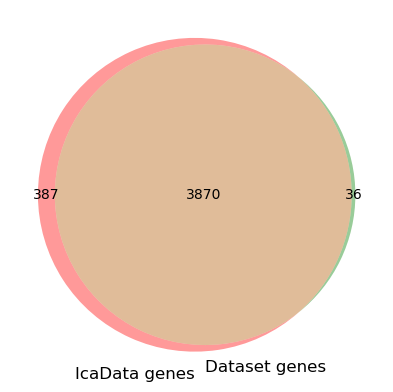

In [16]:
from matplotlib_venn import venn2
venn2((set(ica_data.gene_names),set(loeffler_log_tpm.index)), set_labels=['IcaData genes','Dataset genes'])

## Loading and adding p1k log_tpm (uncentered)

In [17]:
log_tpm_p1k_ref = pd.read_csv("../../data/log_tpm/p1k_average_reference_log_tpm.csv")
log_tpm_p1k_ref.rename(columns={"geneid":"Geneid"},inplace=True)
log_tpm_p1k_ref.index = log_tpm_p1k_ref['Geneid']
log_tpm_p1k_ref.drop('Geneid',axis=1,inplace=True)
log_tpm_p1k_ref

,Reference
Geneid,
b0001,10.372833
b0002,10.314562
b0003,9.982251
b0004,9.973666
b0005,7.132482
...,...
b4753,2.577658
b4754,3.153057
b4755,2.399592


In [18]:
loeffler_combined_log_tpm = pd.concat([log_tpm_p1k_ref,loeffler_log_tpm],axis=1)
loeffler_combined_log_tpm

,Reference,E15R003a01,E15R003a02,E15R003a03,E15R003a04,E15R003a05,E15R003a06,E15R003a07,E15R003a08,E15R003a09,...,E15R003f06,E15R003f07,E15R003f08,E15R003f09,E15R003f10,E15R003f19,E15R003f18,E15R003f17,E15R003f16,E15R003f11
b0001,10.372833,6.524909,6.658910,6.822189,6.955692,6.733350,6.695828,6.988218,6.933620,7.041582,...,6.963965,7.304152,6.665169,7.317181,6.299521,6.905900,6.983304,6.860959,6.683896,6.567570
b0002,10.314562,10.730721,10.750176,10.922532,11.101272,10.974176,10.893894,10.958655,11.008575,10.691917,...,10.632032,10.499772,10.594684,10.445490,10.693568,10.797185,10.880709,10.827520,10.807558,10.704839
b0003,9.982251,9.041227,9.094780,8.978549,9.376225,9.338423,9.232298,9.282784,9.333314,8.910911,...,9.245329,9.263717,9.270779,9.161725,9.272443,9.162367,9.121859,9.076238,9.193506,9.283894
b0004,9.973666,9.880135,9.851862,9.890638,10.109540,10.224216,10.019678,10.117099,10.124488,9.892720,...,10.009957,9.900309,9.911175,9.839889,9.853594,9.782369,9.807207,9.819392,9.849425,9.650551
b0005,7.132482,3.608570,3.824632,3.774430,4.019313,4.267126,4.143204,4.188688,4.000875,3.774364,...,3.547182,3.566633,3.437046,3.738655,3.602661,3.607471,3.801036,3.331750,3.380414,3.655881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b3658,NaN,1.889972,2.371891,2.014911,2.148619,2.266163,2.294707,2.059546,2.346752,1.799262,...,1.430837,1.113469,1.242901,1.161110,0.957230,1.695454,1.373022,0.912976,1.314763,1.428209
b3776,NaN,3.367257,3.464300,3.423627,3.468040,3.438521,3.418869,3.649920,3.595814,3.670148,...,3.625464,3.730000,3.717175,3.782472,3.469063,3.080534,3.283852,3.452852,3.310095,3.791183
b4274,NaN,2.295180,2.458583,2.243640,2.424861,2.423682,2.294553,2.350352,2.322724,2.403699,...,1.851022,2.035565,2.270006,2.191484,1.933910,2.305350,1.658437,2.052746,2.237608,2.461224
b4339,NaN,4.221952,4.222269,4.206497,4.060365,3.872942,4.085093,4.210620,4.358424,4.081140,...,4.406386,4.419871,4.359244,4.721551,4.247752,4.387230,4.374924,4.097688,4.157454,4.656648


## Centering Loeffler log_tpm to p1k reference

In [19]:
loeffler_centered_log_tpm = loeffler_combined_log_tpm.sub(loeffler_combined_log_tpm['Reference'],axis=0)
# dropping reference column, as it is already in p1k
loeffler_centered_log_tpm.drop('Reference',axis=1,inplace=True)
loeffler_centered_log_tpm.dropna(inplace=True)
loeffler_centered_log_tpm

,E15R003a01,E15R003a02,E15R003a03,E15R003a04,E15R003a05,E15R003a06,E15R003a07,E15R003a08,E15R003a09,E15R003a10,...,E15R003f06,E15R003f07,E15R003f08,E15R003f09,E15R003f10,E15R003f19,E15R003f18,E15R003f17,E15R003f16,E15R003f11
b0001,-3.847924,-3.713923,-3.550644,-3.417141,-3.639483,-3.677005,-3.384615,-3.439213,-3.331251,-3.596810,...,-3.408868,-3.068681,-3.707664,-3.055652,-4.073312,-3.466934,-3.389529,-3.511874,-3.688938,-3.805263
b0002,0.416159,0.435614,0.607969,0.786710,0.659613,0.579332,0.644093,0.694013,0.377355,0.492694,...,0.317470,0.185210,0.280122,0.130927,0.379006,0.482623,0.566147,0.512958,0.492996,0.390277
b0003,-0.941024,-0.887471,-1.003702,-0.606025,-0.643827,-0.749953,-0.699466,-0.648936,-1.071340,-0.915336,...,-0.736922,-0.718533,-0.711472,-0.820526,-0.709808,-0.819884,-0.860392,-0.906012,-0.788745,-0.698356
b0004,-0.093531,-0.121804,-0.083028,0.135874,0.250550,0.046012,0.143433,0.150822,-0.080946,-0.146341,...,0.036291,-0.073358,-0.062491,-0.133777,-0.120072,-0.191297,-0.166459,-0.154274,-0.124241,-0.323115
b0005,-3.523912,-3.307850,-3.358052,-3.113169,-2.865356,-2.989278,-2.943794,-3.131607,-3.358117,-3.138540,...,-3.585300,-3.565849,-3.695436,-3.393827,-3.529820,-3.525011,-3.331446,-3.800731,-3.752068,-3.476601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4565,0.022767,0.459245,0.321734,0.178779,-0.438156,0.439239,0.174086,0.241961,0.196072,0.446025,...,0.399084,0.332475,0.798254,0.663092,0.907558,0.529777,0.314719,0.664552,0.402034,0.630644
b4566,0.389092,0.438490,0.431972,0.041707,0.100228,0.336710,0.492614,0.449255,0.457242,0.445367,...,0.840883,0.388282,0.585517,0.733250,0.339899,0.498265,0.453108,0.448401,0.199128,0.596880
b4567,0.099528,-0.036634,0.054481,0.433339,0.302882,0.158422,0.471091,0.057980,0.223294,0.029463,...,-1.278466,-1.288790,-1.058827,-0.832411,-1.245388,-0.200493,-0.512625,-1.112499,-0.987389,-1.617951
b4568,-3.262620,-3.273690,-3.152700,-3.223486,-3.268611,-3.488094,-3.589160,-3.408387,-3.322970,-2.968127,...,-2.832071,-2.386712,-2.407906,-2.455448,-2.421166,-2.802583,-2.873261,-2.734183,-2.559339,-2.605251


## Inferring iM activities

In [20]:
from pymodulon.util import infer_activities

In [21]:
loeffler_activities = infer_activities(ica_data,loeffler_centered_log_tpm)
loeffler_activities.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,E15R003a01,E15R003a02,E15R003a03,E15R003a04,E15R003a05,E15R003a06,E15R003a07,E15R003a08,E15R003a09,E15R003a10,...,E15R003f06,E15R003f07,E15R003f08,E15R003f09,E15R003f10,E15R003f19,E15R003f18,E15R003f17,E15R003f16,E15R003f11
Sugar Diacid,4.494467,4.479502,4.610326,4.113094,3.816104,4.307592,4.136788,4.290725,4.410176,4.655822,...,6.316224,6.189441,6.358622,5.786565,6.277330,4.954267,5.838243,5.703573,5.683503,6.395991
Translation,-8.201144,-8.269141,-9.562217,-6.925124,-6.093513,-5.873793,-6.943069,-7.151849,-7.966233,-9.815052,...,-7.819929,-9.228415,-9.276398,-10.287722,-7.599841,-9.810488,-10.031840,-8.107375,-7.570509,-9.074004
ygdT,-0.663127,-1.100844,-0.737207,-1.219335,-1.664363,-0.990874,-1.787060,-1.134147,-1.245140,-1.634374,...,-1.137314,-1.265383,-1.505136,-1.530275,-0.917678,-1.584029,-1.730013,-1.144790,-0.963802,-0.579068
OxyR,-0.156141,-0.324679,-0.035368,-0.197128,-0.383274,-0.577501,-0.407487,-0.245377,-0.092208,-0.216461,...,0.164657,0.718550,0.422076,0.316286,0.278604,-0.118597,-0.302274,-0.141773,0.088629,0.217444
FlhDC-2,35.663652,35.625833,35.296639,35.840330,35.923597,36.009842,35.640857,35.176622,35.215908,36.006595,...,33.851627,34.300586,34.360401,34.655192,34.806276,35.603120,35.156256,35.412457,35.307011,35.216051


In [22]:
# sample table for ddb_sd
loeffler_sd_sample_table = pd.read_csv("../../data/log_tpm/loeffler2016_log_tpm_metadata.csv")
loeffler_sd_sample_table.index = loeffler_sd_sample_table['sample']
loeffler_sd_sample_table.drop('Unnamed: 0',axis=1,inplace=True)
loeffler_sd_sample_table.drop('sample',axis=1,inplace=True)
loeffler_sd_sample_table.index.name = None
loeffler_sd_sample_table.head()

,study,project,condition,location,sample_port,process_time (min),rep_id,Strain Description,Strain,Culture Type,...,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates,data_source
E15R003a01,STR-PFR scale-down,STR-PFR,STR_S_0,STR,S,0,1,Escherichia coli K-12 W3110 LJ110,LJ110,Chemostat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loeffler2016
E15R003a02,STR-PFR scale-down,STR-PFR,STR_S_0,STR,S,0,1,Escherichia coli K-12 W3110 LJ110,LJ110,Chemostat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loeffler2016
E15R003a03,STR-PFR scale-down,STR-PFR,STR_S_0,STR,S,0,1,Escherichia coli K-12 W3110 LJ110,LJ110,Chemostat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loeffler2016
E15R003a04,STR-PFR scale-down,STR-PFR,STR_S_5,STR,S,5,1,Escherichia coli K-12 W3110 LJ110,LJ110,Chemostat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loeffler2016
E15R003a05,STR-PFR scale-down,STR-PFR,STR_S_10,STR,S,10,1,Escherichia coli K-12 W3110 LJ110,LJ110,Chemostat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loeffler2016


# Adding DDB SD

## Loading uncentered log_tpm

In [23]:
ddb_log_tpm = pd.read_csv("../../data/log_tpm/DDB_SD_log_tpm.csv")
ddb_log_tpm.index = ddb_log_tpm['Geneid']
ddb_log_tpm.drop('Geneid',axis=1,inplace=True)
ddb_log_tpm.index.name = None
ddb_log_tpm

,IC1,IC2,PD_117_R10_S05#,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R14_S05#,PD_117_R15_S05#,PD_117_R16_S05#,PD_117_R5_S05#1,...,PD_123_R11_S05#,PD_123_R12_S05#,PD_123_R13_S05#,PD_123_R14_S05#,PD_123_R16_S05#,PD_123_R5_S05#1,PD_123_R6_S05#1,PD_123_R7_S05#1,PD_123_R8_S05#1,PD_123_R9_S05#1
b0001,11.002527,12.732594,11.081665,10.268826,10.233329,9.989378,10.281131,9.962700,9.636620,11.052673,...,11.458297,11.267593,10.085499,9.882722,11.326079,11.546252,11.009942,10.547354,10.252775,11.109756
b0002,11.220569,10.738328,7.645440,9.522497,9.117753,9.139083,10.197153,9.574051,9.451363,7.754347,...,8.198950,8.182046,7.732953,8.183372,8.484266,7.723273,8.288264,7.555798,7.769895,8.184395
b0003,10.435381,10.161018,7.640769,9.083923,8.782278,8.742474,9.637226,9.655356,9.667506,7.602189,...,7.915476,7.838649,7.802649,8.140787,7.628948,7.644197,7.717265,7.675395,7.815305,7.931424
b0004,9.771227,9.804738,7.383264,8.404835,8.363498,8.215478,9.037703,9.027710,9.083592,7.274509,...,7.717659,7.650119,7.348478,7.944324,7.537017,7.255310,7.627116,7.229710,7.430127,7.605211
b0005,5.653987,5.586375,4.077732,5.696586,5.560236,5.819425,5.957660,6.105838,5.817777,3.851237,...,5.964758,5.553585,4.239501,4.500223,4.855211,3.685820,3.750354,4.067940,3.901692,4.822042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,4.230514,4.425370,4.254882,4.561330,4.487753,4.325511,4.460665,4.465180,4.364449,4.551826,...,4.470585,4.590352,4.411007,4.186948,4.182649,4.348199,4.265695,4.440989,4.497192,4.309950
b4400,3.189838,3.752634,4.494758,3.965982,3.852544,3.911157,3.670875,3.723407,3.565819,4.697106,...,4.559304,4.443707,4.425840,4.334711,4.349915,4.526718,4.385803,4.508516,4.457683,4.035002
b4401,9.820201,9.831346,9.763032,9.383944,9.550908,9.519744,9.535381,9.415804,9.397539,9.874631,...,9.150501,9.178970,9.835445,9.709223,9.609685,9.812988,9.884310,9.685340,9.467322,9.855633
b4402,4.326135,4.178426,3.994410,4.110482,4.243250,3.835672,4.539405,4.594871,4.298146,4.029079,...,3.066592,4.452690,4.266947,3.868857,4.274611,3.653702,3.159177,4.138357,4.434662,4.194130


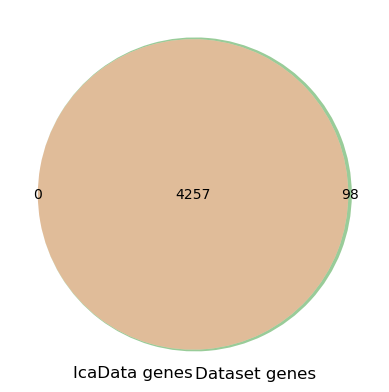

In [24]:
from matplotlib_venn import venn2
venn2((set(ica_data.gene_names),set(ddb_log_tpm.index)), set_labels=['IcaData genes','Dataset genes'])

## Loading and adding p1k log_tpm (uncentered)

In [25]:
log_tpm_p1k_ref = pd.read_csv("../../data/log_tpm/p1k_average_reference_log_tpm.csv")
log_tpm_p1k_ref.rename(columns={"geneid":"Geneid"},inplace=True)
log_tpm_p1k_ref.index = log_tpm_p1k_ref['Geneid']
log_tpm_p1k_ref.drop('Geneid',axis=1,inplace=True)
log_tpm_p1k_ref

,Reference
Geneid,
b0001,10.372833
b0002,10.314562
b0003,9.982251
b0004,9.973666
b0005,7.132482
...,...
b4753,2.577658
b4754,3.153057
b4755,2.399592


In [26]:
ddb_combined_log_tpm = pd.concat([log_tpm_p1k_ref,ddb_log_tpm],axis=1)
ddb_combined_log_tpm.head()

,Reference,IC1,IC2,PD_117_R10_S05#,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R14_S05#,PD_117_R15_S05#,PD_117_R16_S05#,...,PD_123_R11_S05#,PD_123_R12_S05#,PD_123_R13_S05#,PD_123_R14_S05#,PD_123_R16_S05#,PD_123_R5_S05#1,PD_123_R6_S05#1,PD_123_R7_S05#1,PD_123_R8_S05#1,PD_123_R9_S05#1
b0001,10.372833,11.002527,12.732594,11.081665,10.268826,10.233329,9.989378,10.281131,9.962700,9.636620,...,11.458297,11.267593,10.085499,9.882722,11.326079,11.546252,11.009942,10.547354,10.252775,11.109756
b0002,10.314562,11.220569,10.738328,7.645440,9.522497,9.117753,9.139083,10.197153,9.574051,9.451363,...,8.198950,8.182046,7.732953,8.183372,8.484266,7.723273,8.288264,7.555798,7.769895,8.184395
b0003,9.982251,10.435381,10.161018,7.640769,9.083923,8.782278,8.742474,9.637226,9.655356,9.667506,...,7.915476,7.838649,7.802649,8.140787,7.628948,7.644197,7.717265,7.675395,7.815305,7.931424
b0004,9.973666,9.771227,9.804738,7.383264,8.404835,8.363498,8.215478,9.037703,9.027710,9.083592,...,7.717659,7.650119,7.348478,7.944324,7.537017,7.255310,7.627116,7.229710,7.430127,7.605211
b0005,7.132482,5.653987,5.586375,4.077732,5.696586,5.560236,5.819425,5.957660,6.105838,5.817777,...,5.964758,5.553585,4.239501,4.500223,4.855211,3.685820,3.750354,4.067940,3.901692,4.822042


## Centering DDB log_tpm to p1k reference

In [27]:
ddb_centered_log_tpm = ddb_combined_log_tpm.sub(ddb_combined_log_tpm['Reference'],axis=0)
# dropping reference column, as it is already in p1k
ddb_centered_log_tpm.drop('Reference',axis=1,inplace=True)
ddb_centered_log_tpm

,IC1,IC2,PD_117_R10_S05#,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R14_S05#,PD_117_R15_S05#,PD_117_R16_S05#,PD_117_R5_S05#1,...,PD_123_R11_S05#,PD_123_R12_S05#,PD_123_R13_S05#,PD_123_R14_S05#,PD_123_R16_S05#,PD_123_R5_S05#1,PD_123_R6_S05#1,PD_123_R7_S05#1,PD_123_R8_S05#1,PD_123_R9_S05#1
b0001,0.629694,2.359761,0.708832,-0.104007,-0.139504,-0.383456,-0.091702,-0.410133,-0.736213,0.679840,...,1.085463,0.894760,-0.287334,-0.490111,0.953246,1.173418,0.637108,0.174521,-0.120058,0.736923
b0002,0.906006,0.423766,-2.669122,-0.792065,-1.196810,-1.175480,-0.117409,-0.740511,-0.863199,-2.560216,...,-2.115612,-2.132516,-2.581609,-2.131191,-1.830296,-2.591290,-2.026299,-2.758764,-2.544667,-2.130168
b0003,0.453131,0.178768,-2.341482,-0.898327,-1.199972,-1.239777,-0.345025,-0.326894,-0.314745,-2.380061,...,-2.066774,-2.143602,-2.179602,-1.841464,-2.353302,-2.338054,-2.264986,-2.306855,-2.166945,-2.050827
b0004,-0.202440,-0.168928,-2.590402,-1.568831,-1.610168,-1.758189,-0.935963,-0.945956,-0.890075,-2.699157,...,-2.256007,-2.323547,-2.625188,-2.029342,-2.436649,-2.718357,-2.346551,-2.743956,-2.543539,-2.368455
b0005,-1.478494,-1.546107,-3.054750,-1.435895,-1.572246,-1.313057,-1.174822,-1.026644,-1.314704,-3.281245,...,-1.167724,-1.578897,-2.892980,-2.632259,-2.277271,-3.446662,-3.382127,-3.064541,-3.230790,-2.310440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4753,-1.486133,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-1.378435,-2.577658,-2.577658,...,-2.577658,-2.577658,-0.852550,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658
b4754,-1.597809,-1.577602,-0.564506,-3.153057,-2.043284,-1.462093,-2.060873,-0.440469,-2.069383,-3.153057,...,-0.692733,-3.153057,-2.161517,-2.157930,-1.087070,-0.540068,-1.544871,-1.572162,-3.153057,-0.788609
b4755,-0.693843,-0.440590,-1.281795,-0.818578,-1.166233,-1.197902,-1.185077,-0.315392,-0.546795,-0.066109,...,-1.671239,-1.158278,-0.242848,-0.669453,-0.600945,-0.639047,-1.265328,-0.058719,-0.895743,-0.625352
b4756,-0.045931,0.859894,1.375242,1.876592,1.637668,1.539081,1.916208,2.154923,2.096192,1.310260,...,1.654320,1.398988,1.369361,1.596577,2.011551,1.477149,1.389889,1.612875,1.211228,1.538404


## Inferring iM activities for DDB (p1k centered)

In [28]:
from pymodulon.util import infer_activities

In [29]:
ddb_activities = infer_activities(ica_data,ddb_centered_log_tpm)
ddb_activities.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,IC1,IC2,PD_117_R10_S05#,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R14_S05#,PD_117_R15_S05#,PD_117_R16_S05#,PD_117_R5_S05#1,...,PD_123_R11_S05#,PD_123_R12_S05#,PD_123_R13_S05#,PD_123_R14_S05#,PD_123_R16_S05#,PD_123_R5_S05#1,PD_123_R6_S05#1,PD_123_R7_S05#1,PD_123_R8_S05#1,PD_123_R9_S05#1
Sugar Diacid,0.501113,1.619879,2.040696,1.020167,1.197345,0.850214,1.068047,0.610045,0.512208,1.884631,...,2.265654,1.991608,2.998503,2.960430,0.114340,2.151260,2.383052,2.333841,3.479581,2.853875
Translation,-5.809382,-7.176379,-10.284521,-10.902840,-10.164764,-10.259274,-10.689686,-10.423729,-9.757820,-9.349791,...,-8.722169,-7.441674,-12.364902,-10.581489,-7.784352,-9.675677,-8.147482,-11.308496,-10.388960,-10.294053
ygdT,-0.586583,0.372242,-0.320716,0.041506,-0.670147,0.132523,-0.422290,0.117696,0.056805,-0.703101,...,0.163118,-0.755045,-0.202011,-0.040830,-0.243137,-0.996200,-0.845150,-0.692009,0.388851,-0.562191
OxyR,0.256403,0.665020,-1.971484,-1.613056,-1.555714,-1.694463,-1.495795,-1.441919,-1.446199,-1.719415,...,-1.252700,-0.876497,-2.029506,-2.078362,-1.450231,-1.645087,-1.594315,-2.083950,-2.105230,-1.412224
FlhDC-2,-4.032575,-4.648559,1.044113,3.611298,6.416080,7.623470,-2.824312,-1.532157,-2.562691,4.093645,...,9.645942,4.605228,-2.552929,-5.742971,-7.074813,4.664456,0.302949,-2.841635,-6.109174,11.138505


In [30]:
# sample table for ddb_sd
ddb_sd_sample_table = pd.read_csv("../../data/log_tpm/DDB_SD_log_tpm_metadata.csv")
ddb_sd_sample_table.index = ddb_sd_sample_table['sample']
ddb_sd_sample_table.drop('Unnamed: 0',axis=1,inplace=True)
ddb_sd_sample_table.drop('sample',axis=1,inplace=True)
ddb_sd_sample_table.index.name = None
ddb_sd_sample_table.head()

,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,Temperature (C),...,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates,data_source
IC1,Control,control,wt_glc,1,Escherichia coli K-12 BW25113 del_fhuA,BW25113,Batch,No,M9,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd
IC2,Control,control,wt_glc,2,Escherichia coli K-12 BW25113 del_fhuA,BW25113,Batch,No,M9,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd
PD_117_R10_S05#,DDB feast-famine scale-down,ddb_ff_sd,DDB35 C-starv,3,Escherichia coli K-12 BW25113 del_fhuA,DDB35,Fed-batch,No,DDB_BM_016,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd
PD_117_R11_S05#,DDB feast-famine scale-down,ddb_ff_sd,HMP3071 C-lim,1,Escherichia coli K-12 BW25113 FolE(T198I) YnbB...,HMP3071,Fed-batch,No,DDB_BM_016,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd
PD_117_R12_S05#,DDB feast-famine scale-down,ddb_ff_sd,HMP3071 C-lim,2,Escherichia coli K-12 BW25113 FolE(T198I) YnbB...,HMP3071,Fed-batch,No,DDB_BM_016,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd


## Filtering out the HMP strain and the internal control

In [31]:
ddb_sd_sample_table = ddb_sd_sample_table[ddb_sd_sample_table["Strain"] != "BW25113"]
ddb_sd_sample_table = ddb_sd_sample_table[ddb_sd_sample_table["Strain"] != "HMP3071"]

In [32]:
ddb_sd_sample_table.index

Index(['PD_117_R10_S05#', 'PD_117_R5_S05#1', 'PD_117_R6_S05#1',
       'PD_117_R7_S05#1', 'PD_117_R8_S05#1', 'PD_117_R9_S05#1',
       'PD_121_R10_S05#', 'PD_121_R11_S05#', 'PD_121_R12_S05#',
       'PD_121_R13_S05#', 'PD_121_R14_S05#', 'PD_121_R15_S05#',
       'PD_121_R16_S05#', 'PD_121_R5_S05#2', 'PD_121_R6_S05#2',
       'PD_121_R7_S05#2', 'PD_121_R8_S05#2', 'PD_121_R9_S05#2',
       'PD_122_R10_S05#', 'PD_122_R11_S05#', 'PD_122_R12_S05#',
       'PD_122_R13_S05#', 'PD_122_R14_S05#', 'PD_122_R15_S05#',
       'PD_122_R16_S05#', 'PD_122_R5_S05#2', 'PD_122_R6_S05#2',
       'PD_122_R7_S05#2', 'PD_122_R8_S05#1', 'PD_122_R9_S05#2',
       'PD_123_R10_S05#', 'PD_123_R11_S05#', 'PD_123_R12_S05#',
       'PD_123_R13_S05#', 'PD_123_R14_S05#', 'PD_123_R16_S05#',
       'PD_123_R5_S05#1', 'PD_123_R6_S05#1', 'PD_123_R7_S05#1',
       'PD_123_R8_S05#1', 'PD_123_R9_S05#1'],
      dtype='object')

In [33]:
ddb_activities = ddb_activities[ddb_sd_sample_table.index]

In [34]:
ddb_centered_log_tpm = ddb_centered_log_tpm[ddb_sd_sample_table.index]

## Combining activities and sample tables with p1k

In [35]:
new_activities = pd.concat([ica_data.A,ddb_activities],axis=1)
new_activities.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,PD_123_R11_S05#,PD_123_R12_S05#,PD_123_R13_S05#,PD_123_R14_S05#,PD_123_R16_S05#,PD_123_R5_S05#1,PD_123_R6_S05#1,PD_123_R7_S05#1,PD_123_R8_S05#1,PD_123_R9_S05#1
Sugar Diacid,0.048851,-0.048851,2.226245,2.238391,0.222740,0.383348,1.534940,1.480178,0.536021,0.167563,...,2.265654,1.991608,2.998503,2.960430,0.114340,2.151260,2.383052,2.333841,3.479581,2.853875
Translation,0.201055,-0.201055,-8.162122,-8.046208,1.633678,1.973262,-8.058080,-6.272859,-1.536470,-1.828831,...,-8.722169,-7.441674,-12.364902,-10.581489,-7.784352,-9.675677,-8.147482,-11.308496,-10.388960,-10.294053
ygdT,-0.382475,0.382475,0.066040,-0.898701,-0.556961,-1.523642,0.039413,0.002855,0.256867,-1.890067,...,0.163118,-0.755045,-0.202011,-0.040830,-0.243137,-0.996200,-0.845150,-0.692009,0.388851,-0.562191
OxyR,0.130714,-0.130714,0.232581,-0.135165,-0.140487,-0.435341,-0.788937,-1.333850,0.255054,0.464381,...,-1.252700,-0.876497,-2.029506,-2.078362,-1.450231,-1.645087,-1.594315,-2.083950,-2.105230,-1.412224
FlhDC-2,-0.329000,0.329000,-5.319409,-5.196873,-7.144849,-6.758991,-5.930140,-5.934485,-1.775148,-3.070194,...,9.645942,4.605228,-2.552929,-5.742971,-7.074813,4.664456,0.302949,-2.841635,-6.109174,11.138505


In [36]:
new_sample_table = pd.concat([ica_data.sample_table,ddb_sd_sample_table],axis=0)

In [37]:
new_sample_table['data_source'] = new_sample_table['data_source'].fillna('precise1k')

# Self centering DDB

## Centering DDB log_tpm to DDB reference

In [38]:
control_sampels = list(ddb_sd_sample_table[ddb_sd_sample_table["condition"] == "DDB35 C-starv"].index)
control_sampels

['PD_117_R10_S05#',
 'PD_117_R8_S05#1',
 'PD_117_R9_S05#1',
 'PD_121_R6_S05#2',
 'PD_122_R6_S05#2',
 'PD_123_R6_S05#1']

In [39]:
ddb_self_centered_log_tpm = ddb_log_tpm.sub(ddb_log_tpm[control_sampels].mean(axis=1),axis=0)
ddb_self_centered_log_tpm

,IC1,IC2,PD_117_R10_S05#,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R14_S05#,PD_117_R15_S05#,PD_117_R16_S05#,PD_117_R5_S05#1,...,PD_123_R11_S05#,PD_123_R12_S05#,PD_123_R13_S05#,PD_123_R14_S05#,PD_123_R16_S05#,PD_123_R5_S05#1,PD_123_R6_S05#1,PD_123_R7_S05#1,PD_123_R8_S05#1,PD_123_R9_S05#1
b0001,-0.316563,1.413504,-0.237425,-1.050265,-1.085761,-1.329713,-1.037960,-1.356390,-1.682470,-0.266417,...,0.139206,-0.051498,-1.233591,-1.436368,0.006988,0.227161,-0.309149,-0.771736,-1.066316,-0.209334
b0002,3.419302,2.937061,-0.155827,1.721230,1.316486,1.337816,2.395886,1.772784,1.650096,-0.046921,...,0.397683,0.380779,-0.068314,0.382105,0.682999,-0.077994,0.486996,-0.245469,-0.031372,0.383128
b0003,2.688903,2.414540,-0.105710,1.337444,1.035800,0.995995,1.890747,1.908878,1.921027,-0.144290,...,0.168998,0.092170,0.056170,0.394308,-0.117530,-0.102282,-0.029214,-0.071083,0.068827,0.184945
b0004,2.200117,2.233629,-0.187845,0.833726,0.792389,0.644368,1.466594,1.456601,1.512482,-0.296600,...,0.146550,0.079010,-0.222631,0.373215,-0.034092,-0.315799,0.056007,-0.341399,-0.140982,0.034102
b0005,1.683691,1.616078,0.107435,1.726290,1.589939,1.849128,1.987363,2.135541,1.847481,-0.119060,...,1.994461,1.583288,0.269205,0.529926,0.884914,-0.284477,-0.219942,0.097644,-0.068605,0.851745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,-0.075609,0.119247,-0.051241,0.255207,0.181630,0.019388,0.154543,0.159057,0.058326,0.245703,...,0.164462,0.284229,0.104884,-0.119174,-0.123473,0.042076,-0.040428,0.134867,0.191070,0.003827
b4400,-1.309953,-0.747156,-0.005032,-0.533809,-0.647246,-0.588633,-0.828916,-0.776383,-0.933971,0.197315,...,0.059514,-0.056084,-0.073950,-0.165080,-0.149875,0.026927,-0.113988,0.008726,-0.042107,-0.464788
b4401,-0.016787,-0.005642,-0.073956,-0.453044,-0.286080,-0.317244,-0.301607,-0.421184,-0.439449,0.037643,...,-0.686487,-0.658018,-0.001543,-0.127765,-0.227304,-0.024000,0.047322,-0.151648,-0.369666,0.018645
b4402,0.565082,0.417373,0.233357,0.349429,0.482197,0.074619,0.778352,0.833818,0.537093,0.268026,...,-0.694462,0.691636,0.505893,0.107804,0.513557,-0.107351,-0.601877,0.377304,0.673609,0.433077


## Inferring iM activities for DDB (self centered)

In [40]:
from pymodulon.util import infer_activities

In [41]:
ddb_activities_self_centered = infer_activities(ica_data,ddb_self_centered_log_tpm)
ddb_activities_self_centered.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,IC1,IC2,PD_117_R10_S05#,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R14_S05#,PD_117_R15_S05#,PD_117_R16_S05#,PD_117_R5_S05#1,...,PD_123_R11_S05#,PD_123_R12_S05#,PD_123_R13_S05#,PD_123_R14_S05#,PD_123_R16_S05#,PD_123_R5_S05#1,PD_123_R6_S05#1,PD_123_R7_S05#1,PD_123_R8_S05#1,PD_123_R9_S05#1
Sugar Diacid,-1.879886,-0.761120,-0.340303,-1.360832,-1.183654,-1.530785,-1.312952,-1.770954,-1.868791,-0.496368,...,-0.115344,-0.389391,0.617505,0.579432,-2.266659,-0.229739,0.002053,-0.047158,1.098582,0.472876
Translation,3.446677,2.079680,-1.028462,-1.646781,-0.908705,-1.003215,-1.433628,-1.167670,-0.501761,-0.093732,...,0.533890,1.814385,-3.108843,-1.325431,1.471707,-0.419618,1.108577,-2.052437,-1.132901,-1.037994
ygdT,-0.158700,0.800125,0.107167,0.469389,-0.242263,0.560406,0.005593,0.545579,0.484688,-0.275218,...,0.591001,-0.327162,0.225873,0.387053,0.184746,-0.568316,-0.417266,-0.264126,0.816734,-0.134308
OxyR,2.047968,2.456585,-0.179918,0.178510,0.235852,0.097103,0.295770,0.349646,0.345366,0.072151,...,0.538866,0.915069,-0.237940,-0.286796,0.341334,0.146478,0.197251,-0.292384,-0.313664,0.379341
FlhDC-2,-4.972981,-5.588964,0.103708,2.670893,5.475675,6.683064,-3.764718,-2.472563,-3.503097,3.153239,...,8.705537,3.664822,-3.493334,-6.683376,-8.015219,3.724050,-0.637456,-3.782040,-7.049579,10.198099


## Filtering out the HMP strain and the internal control

In [42]:
ddb_activities_self_centered = ddb_activities_self_centered[ddb_sd_sample_table.index]

In [43]:
ddb_self_centered_log_tpm = ddb_self_centered_log_tpm[ddb_sd_sample_table.index]

# Creating ica data object

In [44]:
loeffler_centered_log_tpm

,E15R003a01,E15R003a02,E15R003a03,E15R003a04,E15R003a05,E15R003a06,E15R003a07,E15R003a08,E15R003a09,E15R003a10,...,E15R003f06,E15R003f07,E15R003f08,E15R003f09,E15R003f10,E15R003f19,E15R003f18,E15R003f17,E15R003f16,E15R003f11
b0001,-3.847924,-3.713923,-3.550644,-3.417141,-3.639483,-3.677005,-3.384615,-3.439213,-3.331251,-3.596810,...,-3.408868,-3.068681,-3.707664,-3.055652,-4.073312,-3.466934,-3.389529,-3.511874,-3.688938,-3.805263
b0002,0.416159,0.435614,0.607969,0.786710,0.659613,0.579332,0.644093,0.694013,0.377355,0.492694,...,0.317470,0.185210,0.280122,0.130927,0.379006,0.482623,0.566147,0.512958,0.492996,0.390277
b0003,-0.941024,-0.887471,-1.003702,-0.606025,-0.643827,-0.749953,-0.699466,-0.648936,-1.071340,-0.915336,...,-0.736922,-0.718533,-0.711472,-0.820526,-0.709808,-0.819884,-0.860392,-0.906012,-0.788745,-0.698356
b0004,-0.093531,-0.121804,-0.083028,0.135874,0.250550,0.046012,0.143433,0.150822,-0.080946,-0.146341,...,0.036291,-0.073358,-0.062491,-0.133777,-0.120072,-0.191297,-0.166459,-0.154274,-0.124241,-0.323115
b0005,-3.523912,-3.307850,-3.358052,-3.113169,-2.865356,-2.989278,-2.943794,-3.131607,-3.358117,-3.138540,...,-3.585300,-3.565849,-3.695436,-3.393827,-3.529820,-3.525011,-3.331446,-3.800731,-3.752068,-3.476601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4565,0.022767,0.459245,0.321734,0.178779,-0.438156,0.439239,0.174086,0.241961,0.196072,0.446025,...,0.399084,0.332475,0.798254,0.663092,0.907558,0.529777,0.314719,0.664552,0.402034,0.630644
b4566,0.389092,0.438490,0.431972,0.041707,0.100228,0.336710,0.492614,0.449255,0.457242,0.445367,...,0.840883,0.388282,0.585517,0.733250,0.339899,0.498265,0.453108,0.448401,0.199128,0.596880
b4567,0.099528,-0.036634,0.054481,0.433339,0.302882,0.158422,0.471091,0.057980,0.223294,0.029463,...,-1.278466,-1.288790,-1.058827,-0.832411,-1.245388,-0.200493,-0.512625,-1.112499,-0.987389,-1.617951
b4568,-3.262620,-3.273690,-3.152700,-3.223486,-3.268611,-3.488094,-3.589160,-3.408387,-3.322970,-2.968127,...,-2.832071,-2.386712,-2.407906,-2.455448,-2.421166,-2.802583,-2.873261,-2.734183,-2.559339,-2.605251


In [45]:
new_X = ddb_centered_log_tpm

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_X.index:
    if i not in ica_data.M.index:
        new_X.drop(i, inplace=True)
        
new_self_centered_X = ddb_self_centered_log_tpm

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_self_centered_X.index:
    if i not in ica_data.M.index:
        new_self_centered_X.drop(i, inplace=True)
        
new_self_centered_X = new_self_centered_X.loc[M.index]

new_loeffler_X = loeffler_centered_log_tpm

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_loeffler_X.index:
    if i not in ica_data.M.index:
        new_loeffler_X.drop(i, inplace=True)
        
new_M = ica_data.M.copy()

for i in new_M.index:
    if i not in new_loeffler_X.index:
        new_M.drop(i, inplace=True)
        
new_loeffler_X = new_loeffler_X.loc[new_M.index]

C:\Users\jonas\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
ddb_ica_data = IcaData(
    M = ica_data.M.copy(),
    A = ddb_activities,
    X = new_X,
    gene_table = ica_data.gene_table,
    sample_table = ddb_sd_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

ddb_ica_data_self_centered = IcaData(
    M = ica_data.M.copy(),
    A = ddb_activities_self_centered,
    X = new_self_centered_X,
    gene_table = ica_data.gene_table,
    sample_table = ddb_sd_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

loeffler_ica_data = IcaData(
    M = new_M,
    A = loeffler_activities,
    X = new_loeffler_X,
    gene_table = ica_data.gene_table,
    sample_table = loeffler_sd_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

# Saving combined ica_data

In [47]:
save_to_json(ddb_ica_data,"../../data/ica_data/ddb_sd_ica_data.json")
save_to_json(ddb_ica_data_self_centered,"../../data/ica_data/ddb_sd_self_centered.json")
save_to_json(loeffler_ica_data,"../../data/ica_data/loeffler_ica_data.json")